介绍softmax回归

一个样本  
$\vec{x_{1 \times d}}=\begin{bmatrix}x_1&x_2&…& x_d \end{bmatrix}，
\quad \vec{\hat y}_{1 \times q}=\begin{bmatrix}\hat y_1&\hat y_2&…& \hat y_q \end{bmatrix}$  
线性层输出  
$\vec o_{1 \times q}=\vec{x}_{1 \times d}W_{d \times q}+\vec{b}_{1 \times q}$  
经过softmax规范成概率  
$y_{1 \times q}=softmax(\vec o_{1 \times q})$  
其中  
$\vec{b}_{1 \times q}=\begin{bmatrix}b_1&b_2&…& b_q \end{bmatrix}$  
$\vec{o}_{1 \times q}=\begin{bmatrix}o_1&o_2&…& o_q \end{bmatrix}$  
$\vec{y}_{1 \times q}=\begin{bmatrix}y_1&y_2&…& y_q \end{bmatrix}$  
小批量计算  
$X_{n \times d}=\begin{bmatrix} \vec{x_1} \\ \vec{x_2}\\ …\\ \vec{x_n} \end{bmatrix}
\quad O_{n \times q}=\begin{bmatrix} \vec o_1 \\ \vec o_2\\ …\\ \vec o_n \end{bmatrix}
\quad Y_{n \times q}=\begin{bmatrix} \vec y_1 \\ \vec y_2\\ …\\ \vec y_n \end{bmatrix}
$   
$O_{n \times q}=X_{n \times d}W_{d \times q}+b_{1 \times q}$   
$Y_{n \times q}=softmax(O_{n \times q})$  
b会通过广播机制匹配XW，softmax按行执行计算

损失函数  
在选定了已出现的$x_i$的情况下，结果是对应的$y_i$其中$i=1,……,n$  
说明在$x_i$条件下出现$y_i$的所有集合$P(Y|X)$的概率最大  
又由于每次采样的行为独立同分布，所以有：  
$P(Y|X)=\prod\limits_{i=1}^n p(y_i|x_i)$  
$max  P(Y|X) \quad= \quad min  -\log P(Y|X)$  
$-\log P(Y|X)=\sum\limits_{i=1}^{n} -\log p(y_i|x_i)=\sum\limits_{i=1}^{n} l(y_i,\hat{y_i})$  
对于条件概率，通过贝叶斯公式可以计算出损失函数  
对于每个输出$\vec y_i$，包含q种可能的结果的概率：  
$l(\vec y_i, \vec {\hat{y_i}})=-\sum\limits_{j=1}^{q} \hat{y_j} \log y_j$  
交叉熵损失，衡量预测的概率分布$y_i$与真实概率分布$\hat{y_i}$之间的差距，这里等于KL散度（信息熵=0）  
$$l(y_i,\hat{y_i})=-\sum\limits_{j=1}^{q} \hat{y_j} \log \frac{exp(o_j)}{\sum\limits_{k=1}^q exp(o_k)}
\\=\log \sum\limits_{k=1}^q exp(o_k)-\sum\limits_{j=1}^{q} \hat{y_j}o_j$$  
损失函数对线性变换输出层的某一个结果$o_j$(标量)的导数：  
$$\frac{\partial l}{\partial o_j}=\frac{exp(o_j)}{\sum\limits_{k=1}^q exp(o_k)}-\hat{y_j}=softmax(\vec o_{1 \times q})_j-\hat{y_j}$$
$$\frac{\partial l}{\partial \vec o}
=\begin{bmatrix}softmax(\vec o_{1 \times q})_1-\hat{y_1}&softmax(\vec o_{1 \times q})_2-\hat{y_2}&…& softmax(\vec o_{1 \times q})_q-\hat{y_q} \end{bmatrix}$$
即相对于真实值的概率差距  
真正要求的导数是损失函数对参数的导数：  
$$\frac{\partial l}{\partial W}
=\sum\limits_{i=1}^{q}\frac{\partial l}{\partial o_j}\frac{do_j}{dW}
=\sum\limits_{i=1}^{q}(softmax(\vec o_{1 \times q})_j-\hat{y_j})\frac{do_j}{dW}$$
$$\frac{\partial l}{\partial \vec b}
=\sum\limits_{i=1}^{q}\frac{\partial l}{\partial o_j}\frac{do_j}{d \vec b}
=\sum\limits_{i=1}^{q}(softmax(\vec o_{1 \times q})_j-\hat{y_j}) \begin{bmatrix} 1& 1&…& 1\end{bmatrix}_{1 \times q}$$
其中：  
$$\frac{do_j}{d\vec W_{:j}}=\vec{x}^T_{d \times 1} $$
$$\frac{do_j}{d\vec W_{:i}}=\vec{0}_{d \times 1} \quad i \neq j$$
$$\frac{do_j}{dW}=\begin{bmatrix}\vec o_{d \times 1}^1&\vec o_{d \times 1}^2&…&\vec o_{d \times 1}^{j-1}&\vec{x}^T_{d \times 1}&\vec o_{d \times 1}^{j+1}&…&\vec o_{d \times 1}^{q} \end{bmatrix}$$
所以  
$$\frac{\partial l}{\partial W}
=\vec{x}^T_{d \times 1} \frac{\partial l}{\partial \vec o}
=\begin{bmatrix} x_1 \\ x_2\\ …\\ x_d \end{bmatrix}
\begin{bmatrix}softmax(\vec o_{1 \times q})_1-\hat{y_1}&softmax(\vec o_{1 \times q})_2-\hat{y_2}&…& softmax(\vec o_{1 \times q})_q-\hat{y_q} \end{bmatrix}$$
$$\frac{\partial l}{\partial \vec b}
=\frac{\partial l}{\partial \vec o}\vec{1}_{q \times 1}\vec{1}_{1 \times q}^T
=\begin{bmatrix}softmax(\vec o_{1 \times q})_1-\hat{y_1}&softmax(\vec o_{1 \times q})_2-\hat{y_2}&…& softmax(\vec o_{1 \times q})_q-\hat{y_q} \end{bmatrix}
\begin{bmatrix} 1\\ 1\\…\\ 1\end{bmatrix}_{q \times 1}
\begin{bmatrix} 1& 1&…& 1\end{bmatrix}_{1 \times q}$$


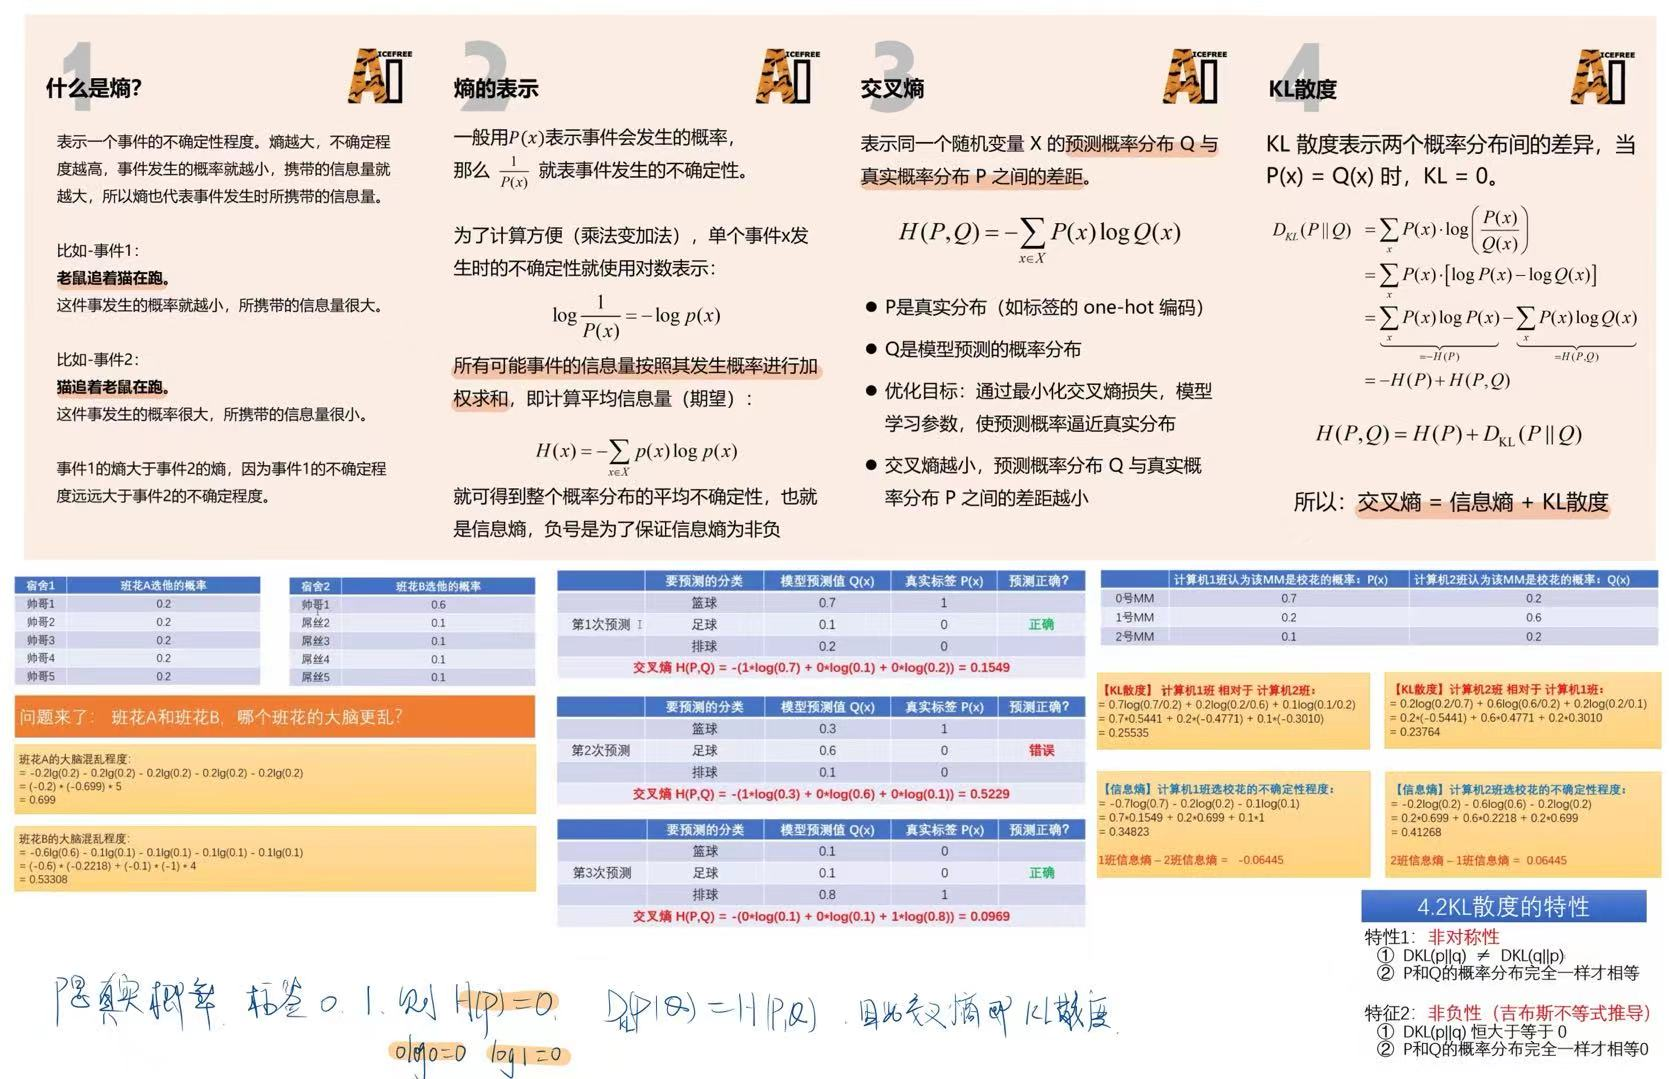

MNIST数据集

In [44]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

数据集需要自己去下载，FashionMNIST，放到./data里，目录结构如下
<pre>
data  
│   └── FashionMNIST  
│       └── raw  
│           ├── t10k-images-idx3-ubyte.gz  
│           ├── t10k-labels-idx1-ubyte.gz  
│           ├── train-images-idx3-ubyte.gz  
│           └── train-labels-idx1-ubyte.gz  
<pre>

In [ ]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=False)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=False)

Fashion-MNIST由10个类别的图像组成，   
每个类别由训练数据集（train dataset）中的6000张图像   
和测试数据集（test dataset）中的1000张图像组成。   
因此，训练集和测试集分别包含60000和10000张图像。  
测试数据集不会用于训练，只用于评估模型性能。

In [46]:
len(mnist_train),len(mnist_train[0]), len(mnist_test) ,len(mnist_test[0])

(60000, 2, 10000, 2)

每个输入图像的高度和宽度均为28像素。  
数据集由灰度图像组成，其通道数为1。  
为了简洁起见，本书将高度h像素、宽度w像素图像的形状记为$h \times w$或（h,w）。

In [47]:
mnist_train[0][0].shape,mnist_train[0][0][0][0],'类别：',mnist_train[0][1]

(torch.Size([1, 28, 28]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
 '类别：',
 9)

In [48]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [49]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


从iter(DataLoader)迭代器里面取出一个batch的数据出来

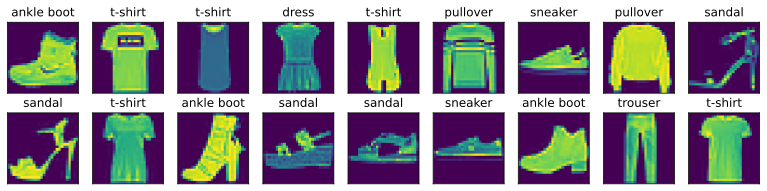

In [50]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。  
通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [51]:
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())


测试读取所有训练数据时间

In [52]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'


'2.42 sec'

整合所有组件  
定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集  
返回训练集和验证集的数据迭代器  
可选参数resize，用来将图像大小调整为另一种形状。

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


通过指定resize参数来测试load_data_fashion_mnist函数的图像大小调整功能

In [54]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


softmax回归的从零开始实现

In [55]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)


初始化模型参数  
每个样本都将用固定长度的向量表示  
原始数据集中的每个样本都是28*28的图像。  
本节将展平每个图像，把它们看作长度为1*784的行向量  
数据集有10个类别，所以网络输出维度为10，输出1*10的行向量  
权重将构成一个784✖10的矩阵，偏置将构成一个1✖10的行向量  
使用正态分布初始化我们的权重W，偏置初始化为0

In [56]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


定义softmax操作  
回顾sum操作与维度保持

In [57]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])#（2,3）
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

实现softmax由三个步骤组成：  
    对每个项求幂（使用exp）；  
    对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；  
    将每一行除以其规范化常数，确保结果的和为1。  
公式：
$$softmax(X)_{ij}=\frac{exp(X_{ij})}{\sum\limits_{k=1}^q exp(X_{ik})}$$
对于任何随机输入，我们将每个元素变成一个非负数。  
此外，依据概率原理，每行总和为1

In [58]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)


(tensor([[0.1018, 0.1250, 0.0272, 0.0627, 0.6834],
         [0.3660, 0.0442, 0.1681, 0.1174, 0.3043]]),
 tensor([1., 1.]))

定义模型  
<pre>
注意输入的X形状为[32,1,28,28]进行reshape((-1,784))后形状为[32,784]  
reshape操作会将张量中的所有元素在逻辑上​​视为一个一维的连续数据流​​，然后按照新的形状重新“切割”这个数据流。
数据排列变化：
    原张量按内存连续顺序排列（行优先，C风格），先按照顺序排成一维向量。
    reshape后，前784个元素组成第一行，接着784个元素组成第二行，依此类推，形成32行 × 784列的矩阵。
内存连续顺序排列：
假如是四维[a,b,c,d]，前d个是[0,0,0,0]~[0,0,0,d]
第d+1到2d是[0,0,1,0]~[0,0,1,d]
………………
第a*b*c*(d-1)+1到a*b*c*d个是[a,b,c,0]~[a,b,c,d]
也就是从最后一个轴开始数起，到达该轴的最大值后前面一个轴+1，类似于abcd种进制
最后得到一维的向量，再按照新的shape进行重排列，也是相同的排序方式

In [59]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

定义损失函数  
交叉熵，预测的概率分布$\vec y_i$，真实概率分布$\vec{\hat{y_i}}$  
由于真实概率是one-hot-encoding,即属于第k类：  
$\vec{\hat y}_{1 \times q}=\begin{bmatrix}0&0&…&0&1^{(k)}&0&…&0\end{bmatrix}$  
因此损失可以简化为  
$l(\vec y_i, \vec {\hat{y_i}})=-\sum\limits_{j=1}^{q} \hat{y_j} \log y_j=-\log y_k$  
多个样本的total loss  
$\sum\limits_{i=1}^{n} l(\vec y_i, \vec {\hat{y_i}})=
\sum\limits_{i=1}^{n}-\log y_{ik}$  
其中，k是第i个样本标签的索引  

创建一个数据样本y，其中包含2个样本在3个类别的预测概率,以及它们对应的标签y_hat  
高级索引操作 y[[0, 1], y_hat]  
选择第0行和第1行，第0行取第0列，第1行取第2列  
y[[0,1], [0,2]] = [y[0,0], y[1,2]] = [0.1, 0.5]

In [60]:
y_hat = torch.tensor([0, 2])#label分别是1,3是正确的
y = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
#对多个样本取出yk,排成向量，下面两种写法等价
y[[0, 1], y_hat],y[range(len(y)), y_hat]

(tensor([0.1000, 0.5000]), tensor([0.1000, 0.5000]))

In [61]:
def cross_entropy(y,y_hat):
    #vec_yk=y[range(len(y)), y_hat]
    return - torch.log(y[range(len(y)), y_hat])

cross_entropy(y,y_hat)

tensor([2.3026, 0.6931])

分类精度  
当预测与标签分类y一致时，即是正确的。  
分类精度即正确预测数量与总预测数量之比。  
虽然直接优化精度可能很困难（因为精度的计算不可导），  
但精度通常是我们最关心的性能衡量标准，我们在训练分类器时几乎总会关注它。 

如果y是矩阵，那么假定第二个维度存储每个类的预测分数。  
我们使用argmax获得每行中最大元素的索引来获得预测类别。  
然后我们将预测类别与真实y_hat元素进行比较。  
由于等式运算符“==”对数据类型很敏感，因此我们将y_hat的数据类型转换为与y的数据类型一致。  
结果是一个包含0（错）和1（对）的张量。  
最后，我们求和会得到正确预测的数量。

In [ ]:
def accuracy(y,y_hat):  #@save
    """计算预测正确的数量"""
    if len(y.shape) > 1 and y.shape[1] > 1:
        y = y.argmax(axis=1)
    #print(y.type(y_hat.dtype) == y_hat)#与y形状相同的true false矩阵
    cmp = y.type(y_hat.dtype) == y_hat
    #y.type(y_hat.dtype) 会将张量 y 的数据类型强制转换为与 y_hat 相同的数据类型
    return float(cmp.type(y_hat.dtype).sum())
accuracy(y,y_hat) / len(y_hat)


tensor([False,  True])


0.5

同样，对于任意数据迭代器data_iter可访问的数据集， 我们可以评估在任意模型net的精度。  
实用程序类Accumulator，用于对多个变量进行累加  
evaluate_accuracy函数中， 我们在Accumulator实例中创建了2个变量， 分别用于存储正确预测的数量和预测的总数量。  
当我们遍历数据集时，两者都将随着时间的推移而累加。  
zip(self.data, args)：将原列表self.data与参数args按位置配对。例如：  
self.data = [1, 2, 3]  
args = (4, 5, 6)  
zip(self.data, args) → [(1,4), (2,5), (3,6)]  

zip() 是一个内置函数，用于将多个可迭代对象（如列表、元组等）中的元素按位置配对，生成一个元组迭代器。其核心行为是“并行迭代”，是处理多序列数据的关键工具。
zip(iterable1, iterable2, ..., iterablen)  
输入：接受多个可迭代对象（如 list, tuple, str, range 等）。  
输出：返回一个 zip 对象（迭代器），需通过 list() 或 for 循环消费内容。  
核心逻辑：按最短输入序列截断，生成元组序列，每个元组包含各输入序列的对应位置元素。  
a = [1, 2, 3]  
b = ["a", "b", "c"]  
c = [True, False, True]  
print(list(zip(a, b, c)))    
输出: [(1, 'a', True), (2, 'b', False), (3, 'c', True)]  
解包操作  
在循环中解包for name, score in zip(names, scores):print(f"{name}: {score}")  
在列表推导式中解包result = [name + str(score) for name, score in zip(names, scores)]# 输出: ['Alice85', 'Bob92', 'Charlie78']  

In [63]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


In [64]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]


In [65]:
evaluate_accuracy(net, test_iter)

0.102

训练  
定义一个函数来训练一个迭代周期epoch  
updater是更新模型参数的常用函数，它接受批量大小作为参数。  
它可以是d2l.sgd函数，也可以是框架的内置优化函数。

isinstance()用于检查一个对象是否是指定类型（或其子类）的实例  
isinstance(object, classinfo)  
isinstance(net, torch.nn.Module) 的作用是：  
验证 net 是否是一个 PyTorch 神经网络模型（或其子类的实例）。

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])#传入batch_size
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]


In [67]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


In [68]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


使用 3.2节中定义的 小批量随机梯度下降来优化模型的损失函数，设置学习率为0.1

In [69]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)


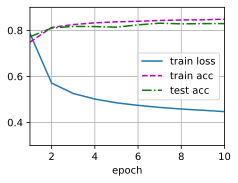

In [70]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)


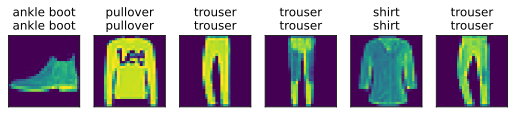

In [71]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)
